# Plot F-layer figures

This notebook makes the final two figures form the manuscript and part of the first figure. It does this by processing output files from a large batch of runs.

In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotting
import bulk_case_runner

## Process all slurry cases and report basic information

We've run a grid of different $\Delta T_{ICB}$, $\Delta X_{ICB}$, $I_0$, $D_L$ and $\mu$
so our first step is to find the $\Delta T_{ICB}$ and $\Delta X_{ICB}$ that give
6 TW of heat production and 27 kg/m^3 of densitiy difference compared to the adiabat
for each set fixed $I_0$, $D_L$ and $\mu$. Not all choices of these parameters produce
'viable' models.

In [8]:
target_density_excess = 27.24 # This is prem - ak135f
target_latent_heat = 6.0*1.0E12 # W ... see arguments in manuscript

basepath = pathlib.Path('/Users/andreww/Desktop/new_slurry_cases/')
filename = "grid.csv"

red = '#d73027'
orange = '#fc8d59'
yellow = '#fee090'
light_blue = '#91bfdb'
dark_blue = '#4575b4'

# Dimond - high nuc rate
# Circle - med nuc rate
# square - low nuc rate

data = [{'dir': 'tx_grid_nuc2_red',
         'color': red, 'm': 's'},
        {'dir': 'tx_grid_nuc1_red',
         'color': red, 'm': 'D'},
        {'dir': 'tx_grid_red',
         'color': red, 'm': 'o'},
        {'dir': 'tx_grid_nuc2_orange',
         'color': orange, 'm': 's'},
        {'dir': 'tx_grid_nuc1_orange',
         'color': orange, 'm': 'D'},
        {'dir': 'tx_grid_orange',
         'color': orange, 'm': 'o'},
        {'dir': 'tx_grid_nuc2_yellow',
         'color': yellow, 'm': 's'},
        {'dir': 'tx_grid_nuc1_yellow',
         'color': yellow, 'm': 'D'},
        {'dir': 'tx_grid_yellow',
         'color': yellow, 'm': 'o'},
        {'dir': 'tx_grid_nuc2',
         'color': light_blue, 'm': 's'},
        {'dir': 'tx_grid_nuc1',
         'color': light_blue, 'm': 'D'},
        {'dir': 'tx_grid',
         'color': light_blue, 'm': 'o'},
        {'dir': 'tx_grid_nuc2_dark_blue',
         'color': dark_blue, 'm': 's'},
        {'dir': 'tx_grid_nuc1_dark_blue',
         'color': dark_blue, 'm': 'D'},
        {'dir': 'tx_grid_dark_blue',
         'color': dark_blue, 'm': 'o'}]

all_matches = None

for thisdata in data:
    print(thisdata["dir"])
    summary_file = basepath / thisdata["dir"] / filename
    summary_df_hetro = pd.read_csv(summary_file)
    
    lx, lt = plotting._get_dt_dx_both(summary_df_hetro, target_latent_heat=target_latent_heat, 
                            target_density_excess=target_density_excess)
    print("Best x:", lx, "best T:", lt)
    match = summary_df_hetro[(summary_df_hetro["dt"] == lt) & 
                             (summary_df_hetro["dx"] == lx)].copy()
    latent_heat = match["total_latent_heat"].values[0] / 1.0E12 # TW
    excess_density = match.liquid_density_excess.values[0] + \
        match.max_solid_excess_density.fillna(0).values[0]
    print(f"Latent heat: {latent_heat} TW")
    print(f"Excess density: {excess_density} kg m^-3")
    if ((abs(excess_density - target_density_excess) < 2.0) and 
        (abs(latent_heat - target_latent_heat) < 6.0E12) and
        (latent_heat > 1.0)):
        print("OK")
        match["color"] = thisdata["color"]
        match["marker"] = thisdata["m"]
        full_file = basepath / thisdata["dir"] / f"detailed_output/case_{lt}_{lx}.pkl"
        match["full_file"] = str(full_file)
        if all_matches is None:
            all_matches = match
        else:
            all_matches = all_matches.append(match)
            
        #plot_summary_figure(summary_df_hetro, target_latent_heat=target_latent_heat, 
        #                target_density_excess=target_density_excess, marker_x=lx,
        #                marker_t=lt, marker=thisdata["m"], marker_color=thisdata["color"])
            
    else:
        print("NOT OK")  
        #plot_summary_figure(summary_df_hetro, target_density_excess=target_density_excess)
    
all_matches

tx_grid_nuc2_red
Best x: 0.00625 best T: -65.0
Latent heat: 0.12416835182339296 TW
Excess density: 26.278166164554932 kg m^-3
NOT OK
tx_grid_nuc1_red
Best x: 0.01 best T: 50.0
Latent heat: 6.054996732567291 TW
Excess density: 26.594680545871597 kg m^-3
OK
tx_grid_red
Best x: 0.008125 best T: -20.0
Latent heat: 6.004454838368143 TW
Excess density: 27.695933944100034 kg m^-3
OK
tx_grid_nuc2_orange
Best x: 0.00625 best T: -65.0
Latent heat: 0.9994313452695192 TW
Excess density: 26.278166177755338 kg m^-3
NOT OK
tx_grid_nuc1_orange
Best x: 0.01 best T: 45.0
Latent heat: 6.376931127779897 TW
Excess density: 27.098904346708878 kg m^-3
OK
tx_grid_orange
Best x: 0.00875 best T: 10.0
Latent heat: 5.541704287254314 TW
Excess density: 26.657045820777057 kg m^-3
OK
tx_grid_nuc2_yellow
Best x: 0.00625 best T: -65.0
Latent heat: 0.09390663419844204 TW
Excess density: 26.278166149268145 kg m^-3
NOT OK
tx_grid_nuc1_yellow
Best x: 0.01 best T: 40.0
Latent heat: 7.85264151205614 TW
Excess density: 27.60

,case,dt,dx,N2,dT_liq,dT_cond,liquid_density_excess,total_latent_heat,total_o_rate,max_particle_radius,max_solid_volume_fraction,max_nucleation_rate,max_solid_excess_density,dlat_abs,drho_abs,color,marker,full_file
298,case_50.0_0.01,50.0,0.010000,4.917301e-08,26.194379,118.157535,26.594679,6.054997e+12,26.074151,0.001574,2.377863e-09,3.897691e-08,1.879258e-06,5.499673e+10,0.645319,#d73027,D,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
707,case_-20.0_0.008125,-20.0,0.008125,5.120572e-08,85.861907,48.157535,27.695933,6.004455e+12,26.265978,0.003357,1.618397e-09,9.154618e-10,1.290282e-06,4.454838e+09,0.455934,#d73027,o,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
327,case_45.0_0.01,45.0,0.010000,5.010381e-08,31.194379,113.157535,27.098904,6.376931e+12,27.457615,0.002614,5.259335e-10,5.143246e-08,4.156900e-07,3.769311e+11,0.141096,#fc8d59,D,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
532,case_10.0_0.00875,10.0,0.008750,4.928806e-08,59.303787,78.157535,26.657046,5.541704e+12,24.070757,0.005326,3.194808e-10,8.315209e-10,2.539382e-07,4.582957e+11,0.582954,#fc8d59,o,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
356,case_40.0_0.01,40.0,0.010000,5.103459e-08,36.194379,108.157535,27.603149,7.852642e+12,33.832194,0.001770,1.310377e-09,6.100067e-08,1.035793e-06,1.852642e+12,0.363150,#fee090,D,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
824,case_-40.0_0.0075,-40.0,0.007500,5.126271e-08,102.422297,28.157535,27.726835,6.239859e+12,27.355225,0.003689,5.798618e-10,9.397019e-10,4.636149e-07,2.398587e+11,0.486836,#fee090,o,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
502,case_15.0_0.009375,15.0,0.009375,5.202219e-08,57.747943,83.157535,28.138229,6.535375e+12,28.284940,0.026495,1.631219e-10,8.230911e-12,1.293211e-07,5.353751e+11,0.898230,#91bfdb,s,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
298,case_50.0_0.01,50.0,0.010000,4.917301e-08,26.194379,118.157535,26.594679,2.471971e+12,10.642203,0.011125,1.084167e-10,3.897691e-10,8.568350e-08,3.528029e+12,0.645321,#91bfdb,o,/Users/andreww/Desktop/new_slurry_cases/tx_gri...
502,case_15.0_0.009375,15.0,0.009375,5.202219e-08,57.747943,83.157535,28.138229,6.834618e+12,29.620531,0.001011,2.147316e-09,8.230911e-08,1.702378e-06,8.346178e+11,0.898231,#4575b4,D,/Users/andreww/Desktop/new_slurry_cases/tx_gri...


## First, the summary plot...

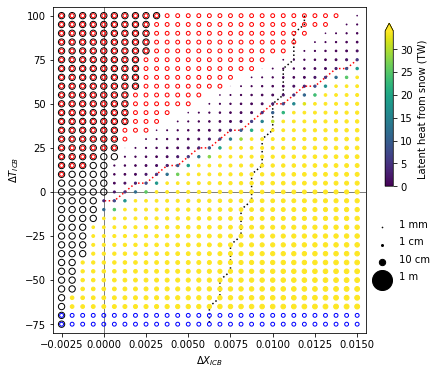

In [2]:
target_density_excess = 27.24 # This is prem - ak135f
target_latent_heat = 6.0*1.0E12 # W 

summary_file = pathlib.Path('/Users/andreww/Desktop/new_slurry_cases/tx_grid/grid.csv')
summary_df = pd.read_csv(summary_file)
plotting.plot_summary_figure(summary_df, target_latent_heat=target_latent_heat, 
                    target_density_excess=target_density_excess)

## Plot the (input) temperature and composition profiles 

This *should* be the optimum location, but currently do not get access to this.

BV freq = 0.00022590837386311853
Pressure at ICB: 329.1010089948369 GPa
Pressure at top of F-layer 317.7026904318656 GPa
g at ICB: 4.403124222842614 m/s**2
g at top of F-layer 5.010242771751181 m/s**2
Temperature at CMB: 1565.182533320388 K
Liquid density at ICB: 12792.534318523183 Kg/m^3
Liquid density at top of F-layer 12542.509302676566 Kg/m^3
Liquid density along adiabat at ICB: 12764.931169768386 Kg/m^3
Liquid density along adiabat at top of F-layer 12571.912798104033 Kg/m^3
Liquid density difference at ICB: 27.603148754797076 Kg/m^3


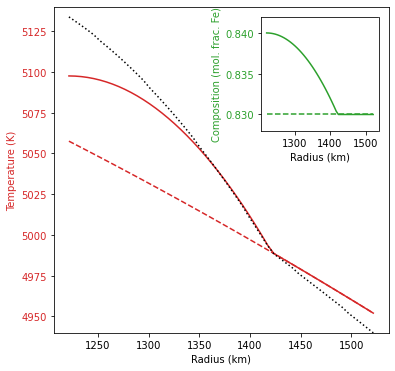

In [3]:
plotting.make_layer_plot(40, 0.01, 0.83)

## Finally - the detailed plot

This should also come from the crossing point.

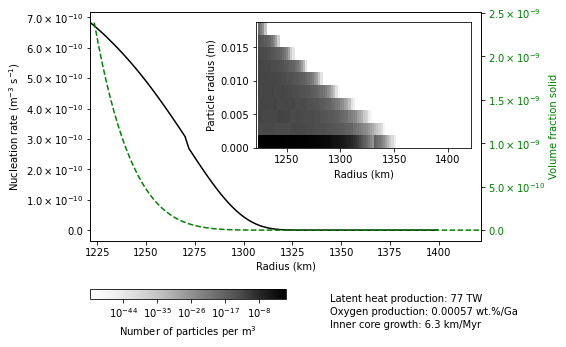

In [4]:
# Light blue circle for paper

file = '/Users/andreww/Desktop/new_slurry_cases/tx_grid/detailed_output/case_35.0_0.01.pkl'
data = bulk_case_runner.load_case_data(file)
plotting.plot_case_figure(data)

In [5]:
data

{'f_layer_thickness': 200000,
 'xfe_outer_core': 0.83,
 'growth_prefactor': 150.0,
 'i0': 1e-09,
 'surf_energy': 1.08,
 'wetting_angle': 5.0,
 'number_of_analysis_points': 100,
 'number_of_knots': 5,
 'r_icb': 1221500,
 'r_cmb': 3480000,
 'gruneisen_parameter': 1.5,
 'chemical_diffusivity': 1e-09,
 'kinematic_viscosity': 2e-06,
 'thermal_conductivity': 100.0,
 'max_time': '1.0E20',
 'hetrogeneous_radius': 1e-09,
 'solutions': [  message: 'A termination event occurred.'
       nfev: 38
       njev: 0
        nlu: 0
        sol: <scipy.integrate._ivp.common.OdeSolution object at 0x129943250>
     status: 1
    success: True
          t: array([0.00000000e+00, 2.34042028e-02, 5.74627861e-02, 3.98048619e-01,
         3.80390695e+00, 3.78624903e+01, 7.59508356e+01])
   t_events: [array([75.95083559]), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], 